In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import re
import nltk
import spacy
import string
import pandas as pd
!pip install textract
import textract
!pip install antiword
!apt-get update
!apt-get install -y libreoffice
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [874 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,084 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubun

In [4]:
os.listdir('drive/MyDrive/Resumes_Docx/')

['Peoplesoft',
 'Peoplesoft Resume',
 'React Developer',
 'SQL Developer',
 'workday']

In [5]:
file_path1 = []
category1  = []
directory1 = 'drive/MyDrive/Resumes_Docx/workday/'
for i in os.listdir(directory1):
    if i.endswith('.docx') or i.endswith('.doc'):
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('workday')

In [6]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday
1,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday
2,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday
3,Srikanth (WORKDAY hCM Consultant)\t ...,workday
4,Vinay kumar .v\nWorkday Functional Consultant\...,workday
5,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday
6,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday
7,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,workday
8,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,workday
9,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday


In [7]:
file_path2 = []
category2  = []
directory2 = 'drive/MyDrive/Resumes_Docx/SQL Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx') or i.endswith('.doc'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('SQL Developer')

In [8]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
1,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
3,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
4,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer
5,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
6,convert /content/drive/MyDrive/Resumes_Docx/SQ...,SQL Developer
7,BUDDHA VAMSI ...,SQL Developer
8,convert /content/drive/MyDrive/Resumes_Docx/SQ...,SQL Developer
9,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


SQL Developer Resumes and Skills
                      File_Name  \
20           Ramalakshmi K.docx   
21  Rajupavanakumari[2_10].docx   
22       RameshNataru[3_4].docx   
23           Neeraj Mishra.docx   
24                 premsai.docx   
25         PSyamKumar[2_3].docx   
26               Priyanka L.doc   
27            Buddha Vamsi.docx   
28             Nazeer Basha.doc   
29   AradhanaTripathi[4_0].docx   
30              Anil kumar.docx   
31         kamballapradeep.docx   
32                 Vinod B.docx   
33    Tatikonda Kiran Kumar.doc   

                                               Skills  
20                       ETL, SSIS, AWS, Python, R, C  
21                 Triggers, Performance Tuning, R, C  
22  Triggers, Performance Tuning, Microsoft SQL Se...  
23                                     Triggers, R, C  
24  Triggers, Performance Tuning, Microsoft SQL Se...  
25  Triggers, Performance Tuning, Microsoft SQL Se...  
26  Triggers, Performance Tuning, Microsoft SQL S

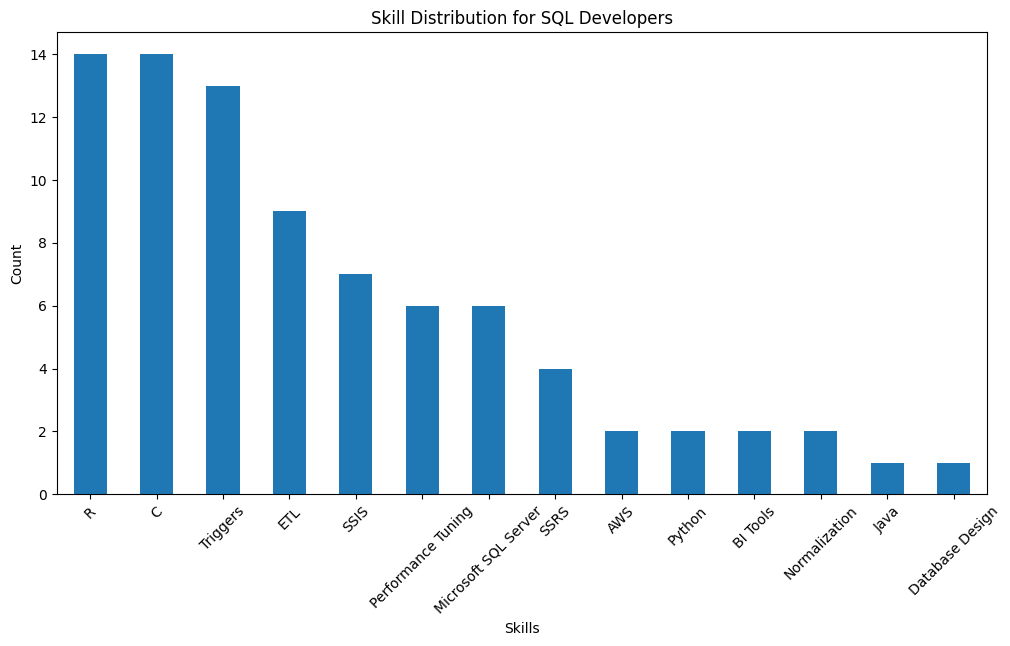

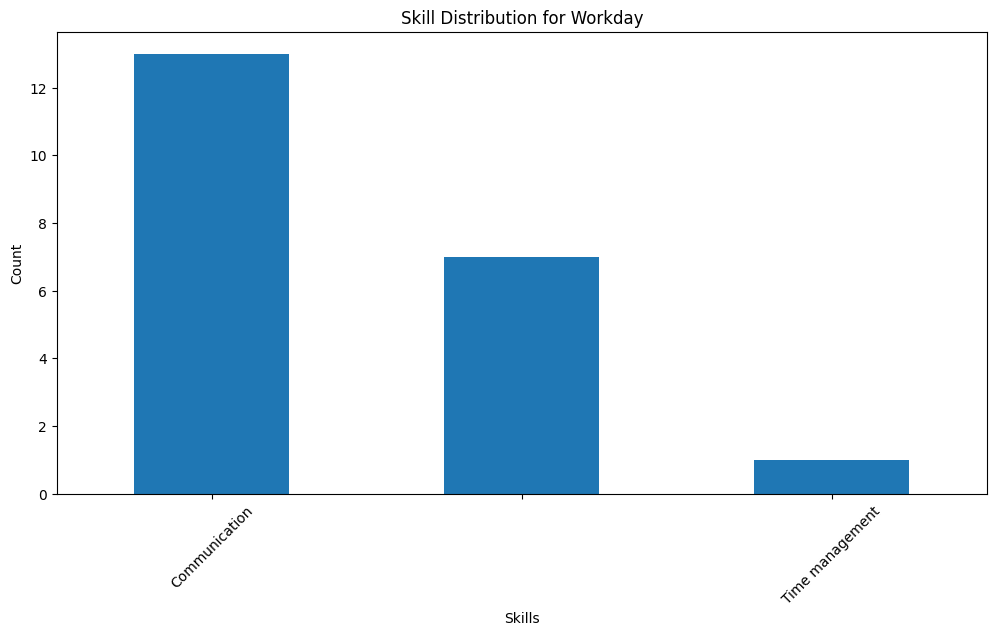


SQL Developer Resumes and Skills
                  File_Name                                                                    Skills
         Ramalakshmi K.docx                                              ETL, SSIS, AWS, Python, R, C
Rajupavanakumari[2_10].docx                                        Triggers, Performance Tuning, R, C
     RameshNataru[3_4].docx Triggers, Performance Tuning, Microsoft SQL Server, ETL, SSIS, SSRS, R, C
         Neeraj Mishra.docx                                                            Triggers, R, C
               premsai.docx                  Triggers, Performance Tuning, Microsoft SQL Server, R, C
       PSyamKumar[2_3].docx       Triggers, Performance Tuning, Microsoft SQL Server, ETL, SSIS, R, C
             Priyanka L.doc       Triggers, Performance Tuning, Microsoft SQL Server, ETL, SSIS, R, C
          Buddha Vamsi.docx                                                 Triggers, ETL, R, C, Java
           Nazeer Basha.doc                     

In [9]:
import os
import textract
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define skills for each category
sql_skills = [
    "Database Design", "Data Modeling", "Normalization", "Triggers",
    "Performance Tuning", "Microsoft SQL Server", "ETL", "SSIS",
    "SSRS", "BI Tools", "Azure SQL Database", "AWS", "Python",
    "R", "C", "Java"
]
workday_skills = [
    "Collaboration", "Communication", "Consulting skills",
    "Time management", "Python"
]

# Function to extract resumes from a given directory
def extract_resumes_from_directory(directory, category):
    file_names = []
    file_path = []
    for file in os.listdir(directory):
        if file.endswith('.docx') or file.endswith('.doc'):
            text = textract.process(os.path.join(directory, file)).decode('utf-8')
            file_names.append(file)
            file_path.append(text)
    return pd.DataFrame({'File_Name': file_names, 'Raw_Details': file_path, 'Category': category})

# Extract resumes from different directories
directories = {
    'workday': 'drive/MyDrive/Resumes_Docx/workday/',
    'SQL Developer': 'drive/MyDrive/Resumes_Docx/SQL Developer/',
    # Add other categories and directories as needed
}

all_data = pd.DataFrame()
for category, directory in directories.items():
    data = extract_resumes_from_directory(directory, category)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Function to preprocess the text data
def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Preprocess the 'Raw_Details' column
all_data['Processed_Details'] = all_data['Raw_Details'].apply(preprocess_text)

# Function to check for the presence of skills
def extract_skills(text, skills):
    found_skills = [skill for skill in skills if skill.lower() in text]
    return ', '.join(found_skills)

# Apply the skill extraction function
all_data['Skills'] = all_data.apply(
    lambda row: extract_skills(row['Processed_Details'], sql_skills) if row['Category'] == 'SQL Developer'
    else extract_skills(row['Processed_Details'], workday_skills), axis=1)

# Separate data for SQL Developer and Workday
sql_data = all_data[all_data['Category'] == 'SQL Developer'][['File_Name', 'Skills']]
workday_data = all_data[all_data['Category'] == 'workday'][['File_Name', 'Skills']]

# Display the results in a neat format
print("SQL Developer Resumes and Skills")
print(sql_data)

print("\nWorkday Resumes and Skills")
print(workday_data)

# Plotting the skill counts for SQL Developer
sql_skill_counts = sql_data['Skills'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 6))
sql_skill_counts.plot(kind='bar')
plt.title('Skill Distribution for SQL Developers')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the skill counts for Workday
workday_skill_counts = workday_data['Skills'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 6))
workday_skill_counts.plot(kind='bar')
plt.title('Skill Distribution for Workday')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display the results as DataFrame tables
print("\nSQL Developer Resumes and Skills")
print(sql_data.to_string(index=False))

print("\nWorkday Resumes and Skills")
print(workday_data.to_string(index=False))

# If you want to save the data to CSV files
sql_data.to_csv('SQL_Developer_Resumes_Skills.csv', index=False)
workday_data.to_csv('Workday_Resumes_Skills.csv', index=False)


In [10]:
file_path3 = []
category3  = []
directory3 = 'drive/MyDrive/Resumes_Docx/React Developer/'
for i in os.listdir(directory3):
    if i.endswith('.docx') or i.endswith('.doc'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('React Developer')

In [11]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,Name: Ravali P \n\n\n\n ...,React Developer
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React Developer
3,SUSOVAN BAG \n\nSeeking a challenging po...,React Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React Developer
5,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React Developer
6,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React Developer
7,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React Developer
8,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React Developer
9,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React Developer


In [12]:
file_path4 = []
category4  = []
directory4 = 'drive/MyDrive/Resumes_Docx/Peoplesoft Resume/'
for i in os.listdir(directory4):
    if i.endswith('.docx') or i.endswith('.doc'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Peoplesoft Resume')

In [14]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,Peoplesoft Resume
1,convert /content/drive/MyDrive/Resumes_Docx/Pe...,Peoplesoft Resume
2,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft Resume
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",Peoplesoft Resume
4,PeopleSoft Administration\n\n \n\nVivekanand S...,Peoplesoft Resume
5,convert /content/drive/MyDrive/Resumes_Docx/Pe...,Peoplesoft Resume
6,convert /content/drive/MyDrive/Resumes_Docx/Pe...,Peoplesoft Resume
7,convert /content/drive/MyDrive/Resumes_Docx/Pe...,Peoplesoft Resume
8,convert /content/drive/MyDrive/Resumes_Docx/Pe...,Peoplesoft Resume
9,convert /content/drive/MyDrive/Resumes_Docx/Pe...,Peoplesoft Resume


In [21]:
file_path5 = []
category5 = []
directory5 = 'drive/MyDrive/Resumes_Docx/Peoplesoft/'
for i in os.listdir(directory5):
    if i.endswith('.docx') or i.endswith('.doc'):
        os.path.join(directory5, i)
        file_path5.append((textract.process(os.path.join(directory5, i).decode('utf-8'))))
        category5.append('Peoplesoft')


KeyError: "There is no item named 'word/document.xml' in the archive"

In [16]:
data5 = pd.DataFrame(data = file_path5 , columns = ['Raw_Details'])
data5['Category5'] = category5
data5

,Raw_Details,Category5


In [22]:
resume_data = pd.concat([data1, data2, data3, data4, data5], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category5
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,NaN,NaN,NaN,NaN
1,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday,NaN,NaN,NaN,NaN
2,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday,NaN,NaN,NaN,NaN
3,Srikanth (WORKDAY hCM Consultant)\t ...,workday,NaN,NaN,NaN,NaN
4,Vinay kumar .v\nWorkday Functional Consultant\...,workday,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
69,Classification: Internal\n\nClassification: In...,NaN,NaN,NaN,Peoplesoft Resume,NaN
70,convert /content/drive/MyDrive/Resumes_Docx/Pe...,NaN,NaN,NaN,Peoplesoft Resume,NaN
71,Hari Narayana \t\t \n\n\t\n\n\n\n...,NaN,NaN,NaN,Peoplesoft Resume,NaN
72,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,NaN,NaN,NaN,Peoplesoft Resume,NaN


In [23]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Raw_Details  74 non-null     object 
 1   Category1    20 non-null     object 
 2   Category2    14 non-null     object 
 3   Category3    21 non-null     object 
 4   Category4    19 non-null     object 
 5   Category5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 3.6+ KB


In [24]:
resume_data['Category'] = category1 + category2 + category3 + category4 + category5
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category5,Category
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,workday,NaN,NaN,NaN,NaN,workday
1,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday,NaN,NaN,NaN,NaN,workday
2,convert /content/drive/MyDrive/Resumes_Docx/wo...,workday,NaN,NaN,NaN,NaN,workday
3,Srikanth (WORKDAY hCM Consultant)\t ...,workday,NaN,NaN,NaN,NaN,workday
4,Vinay kumar .v\nWorkday Functional Consultant\...,workday,NaN,NaN,NaN,NaN,workday
...,...,...,...,...,...,...,...
69,Classification: Internal\n\nClassification: In...,NaN,NaN,NaN,Peoplesoft Resume,NaN,Peoplesoft Resume
70,convert /content/drive/MyDrive/Resumes_Docx/Pe...,NaN,NaN,NaN,Peoplesoft Resume,NaN,Peoplesoft Resume
71,Hari Narayana \t\t \n\n\t\n\n\n\n...,NaN,NaN,NaN,Peoplesoft Resume,NaN,Peoplesoft Resume
72,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,NaN,NaN,NaN,Peoplesoft Resume,NaN,Peoplesoft Resume


In [25]:

resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4', 'Category5'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [26]:
resume_data.head(15)

,Category,Raw_Details
0,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
1,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...
2,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...
3,workday,Srikanth (WORKDAY hCM Consultant)\t ...
4,workday,Vinay kumar .v\nWorkday Functional Consultant\...
5,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...
6,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...
7,workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
8,workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
9,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...


In [27]:
resume_data["Raw_Details"][4]

'Vinay kumar .v\nWorkday Functional Consultant\n\n\n\nEXPERTISE SUMMARY\t\n\nHaving 4.2 years of Total Experience in as a Workday  Functional Consultant.\n\nKnowledge on the functional modules of Workday (Core HCM, Supervisory Organization, Delegation, Cost Center, Locations and Knowledge on Security).\n\nExperience in implementing Workday Functional and Integrations for various modules including HCM Core, Compensation, Time Tracking and Absence Management, Payroll, Benefits and Performance Management.\n\nHaving good knowledge on Security Groups: Role Based, User Based & Job Based.\n\nExperienced in Report Writing, Custom Reports (Simple, Advanced, Matrix and Composite), Calculated Fields, Integrations, EIB, Connectors, XML, XSLT, Workday web services, Organization Structure & Custom Objects. \n\nHands-on experience In Migrating the XSLT Code, Reports from Lower tenant to Sandbox and Production using Object Transporter.  \n\nExcellent object management skills in Workday like configurin

In [29]:
resume_data.to_csv('Raw_Resume.csv', index=False)

In [30]:
resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
1,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...
2,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...
3,workday,Srikanth (WORKDAY hCM Consultant)\t ...
4,workday,Vinay kumar .v\nWorkday Functional Consultant\...
...,...,...
69,Peoplesoft Resume,Classification: Internal\n\nClassification: In...
70,Peoplesoft Resume,convert /content/drive/MyDrive/Resumes_Docx/Pe...
71,Peoplesoft Resume,Hari Narayana \t\t \n\n\t\n\n\n\n...
72,Peoplesoft Resume,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...


In [31]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details


In [32]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

In [33]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,1076
1,convert /content/drive/MyDrive/Resumes_Docx/wo...,1111
2,convert /content/drive/MyDrive/Resumes_Docx/wo...,1155
3,Srikanth (WORKDAY hCM Consultant)\t ...,1063
4,Vinay kumar .v\nWorkday Functional Consultant\...,702


In [34]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,8329
1,convert /content/drive/MyDrive/Resumes_Docx/wo...,7186
2,convert /content/drive/MyDrive/Resumes_Docx/wo...,7386
3,Srikanth (WORKDAY hCM Consultant)\t ...,6737
4,Vinay kumar .v\nWorkday Functional Consultant\...,5126


In [35]:
file_list = ['file1.txt', 'file2.txt', 'file3.txt']

In [36]:
import glob

file_list = glob.glob('/content/drive/MyDrive/Resumes_Docx/')

In [40]:
import re
import glob

def extract_keywords(file_list, num_keywords):
  """
  Extracts the top `num_keywords` keywords from a list of files.

  Args:
    file_list: A list of file paths.
    num_keywords: The number of keywords to extract from each file.

  Returns:
    A list of lists, where each inner list contains the top `num_keywords` keywords from the corresponding file.
  """

keywords_list = []
for file in file_list:
  with open(f"/content/drive/MyDrive/Resumes_Docx/", 'r') as f:
    text = f.read()

    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()

    # Split into words and count frequency
    word_counts = {}
    for word in text.split():
      word_counts[word] = word_counts.get(word, 0) + 1

    # Sort by frequency and extract top keywords
    sorted_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
keywords_list.append([word for word, count in sorted_words[:num_keywords]])

file_list = glob.glob('/drive/MyDrive/Resumes_Docx/*')

FileNotFoundError: [Errno 2] No such file or directory: 'file'

In [ ]:
import re

def extract_keywords(file_list, num_keywords):
  """
  Extracts the top `num_keywords` keywords from a list of files.

  Args:
    file_list: A list of file paths.
    num_keywords: The number of keywords to extract from each file.

  Returns:
    A list of lists, where each inner list contains the top `num_keywords` keywords from the corresponding file.
  """

keywords_list = []
for file in file_list:
  with open(f"/content/drive/MyDrive/Resumes_Docx/{file}", 'r') as f:
    text = f.read()

    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()

    # Split into words and count frequency
    word_counts = {}
    for word in text.split():
      word_counts[word] = word_counts.get(word, 0) + 1

    # Sort by frequency and extract top keywords
    sorted_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
def find_keywords(text, num_keywords):
    """
    Finds the most frequent keywords in a text.

    Args:
        text: The text to analyze.
        num_keywords: The number of keywords to return.

    Returns:
        A list of the most frequent keywords.
    """

    # Tokenize the text and count the occurrences of each word
    word_counts = Counter(word for word in text.split())

    # Sort the words by their frequency
    sorted_words = word_counts.most_common()

    # Extract the most
file_list = ['file1.txt', 'file2.txt', 'file3.txt']
num_keywords = 5
keywords_list = extract_keywords(file_list, num_keywords)

for i, keywords in enumerate(keywords_list):
  print(f"Keywords extracted from file {file_list[i]}:")
  print(keywords)

TypeError: 'NoneType' object is not iterable

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,216
1,convert /content/drive/MyDrive/Resumes_Docx/wo...,197
2,convert /content/drive/MyDrive/Resumes_Docx/wo...,221
3,Vinay kumar .v\nWorkday Functional Consultant\...,150
4,Srikanth (WORKDAY hCM Consultant)\t ...,194


In [ ]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,6
1,convert /content/drive/MyDrive/Resumes_Docx/wo...,3
2,convert /content/drive/MyDrive/Resumes_Docx/wo...,6
3,Vinay kumar .v\nWorkday Functional Consultant\...,2
4,Srikanth (WORKDAY hCM Consultant)\t ...,9


In [ ]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,955,6542,216,6
1,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...,1155,7386,197,3
2,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...,1650,8063,221,6
3,workday,Vinay kumar .v\nWorkday Functional Consultant\...,702,5126,150,2
4,workday,Srikanth (WORKDAY hCM Consultant)\t ...,1063,6737,194,9
...,...,...,...,...,...,...
74,Peoplesoft Resume,Classification: Internal\n\nClassification: In...,558,4917,114,7
75,Peoplesoft Resume,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
76,Peoplesoft Resume,convert /content/drive/MyDrive/Resumes_Docx/Pe...,1038,6221,139,22
77,Peoplesoft Resume,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4


In [ ]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [ ]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

In [ ]:
resume_data

,Category,Raw_Details,Resume_Details
0,workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,chinna subbarayudu dob march nationality india...
1,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...,convert content drive mydrive resumes_docx wor...
2,workday,convert /content/drive/MyDrive/Resumes_Docx/wo...,convert content drive mydrive resumes_docx wor...
3,workday,Vinay kumar .v\nWorkday Functional Consultant\...,vinay kumar workday functional consultant expe...
4,workday,Srikanth (WORKDAY hCM Consultant)\t ...,srikanth workday hcm consultant seeking suitab...
...,...,...,...
74,Peoplesoft Resume,Classification: Internal\n\nClassification: In...,classification internal classification interna...
75,Peoplesoft Resume,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
76,Peoplesoft Resume,convert /content/drive/MyDrive/Resumes_Docx/Pe...,convert content drive mydrive resumes_docx peo...
77,Peoplesoft Resume,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...


In [ ]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,workday,chinna subbarayudu dob march nationality india...
1,workday,convert content drive mydrive resumes_docx wor...
2,workday,convert content drive mydrive resumes_docx wor...
3,workday,vinay kumar workday functional consultant expe...
4,workday,srikanth workday hcm consultant seeking suitab...
...,...,...
74,Peoplesoft Resume,classification internal classification interna...
75,Peoplesoft Resume,sirazuddin bangalore india sirazuddin bangalor...
76,Peoplesoft Resume,convert content drive mydrive resumes_docx peo...
77,Peoplesoft Resume,tanna sujatha objective seeking challenging ro...


In [ ]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,workday,chinna subbarayudu dob march nationality india...
1,workday,convert content drive mydrive resumes_docx wor...
2,workday,convert content drive mydrive resumes_docx wor...
3,workday,vinay kumar workday functional consultant expe...
4,workday,srikanth workday hcm consultant seeking suitab...
...,...,...
74,Peoplesoft Resume,classification internal classification interna...
75,Peoplesoft Resume,sirazuddin bangalore india sirazuddin bangalor...
76,Peoplesoft Resume,convert content drive mydrive resumes_docx peo...
77,Peoplesoft Resume,tanna sujatha objective seeking challenging ro...


In [ ]:
resume_data.Resume_Details[5]

'name gopi krishna reddy professional summery working workday consultant years workday consultant good experience report writing integration hcm knowledge software development life cycle design scoping requirements gathering analysis development testing user acceptance deployment maintenance support change management good working knowledge inbound outbound eib integration concepts created various eib integrations building core connector integrations extracting worker position status leave absence delta changes designed built types integrations using document transformation eib picof cloud connectors custom report writer good knowledge workday studio experience xml xpath xslt expert designing development interfaces legacy third party systems hands experience migrating xslt code reports lower tenant sandbox production using object transporter experienced developing custom reports advanced reports using report writer strong experience using technologies involving workday applications repo

EDA

1. Import Library

In [3]:
!pip install textblob

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/626.3 kB 825.8 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00


In [4]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [8]:
file_path   = r"C:\Users\MD SUFIYA\Downloads\Resumes_Docx"
doc_file    = []
pdf_file    = []
docx_file   = []


for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)

        elif file.endswith('.docx'):
            docx_file.append(file)

        else:
            pdf_file.append(file)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\MD SUFIYA\\Downloads\\Resumes_DocxCleaned_Resumes.csv'

In [43]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 25 
Number of .pdf Files  = 1 
Number of .docx Files = 50


In [44]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  76


In [45]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

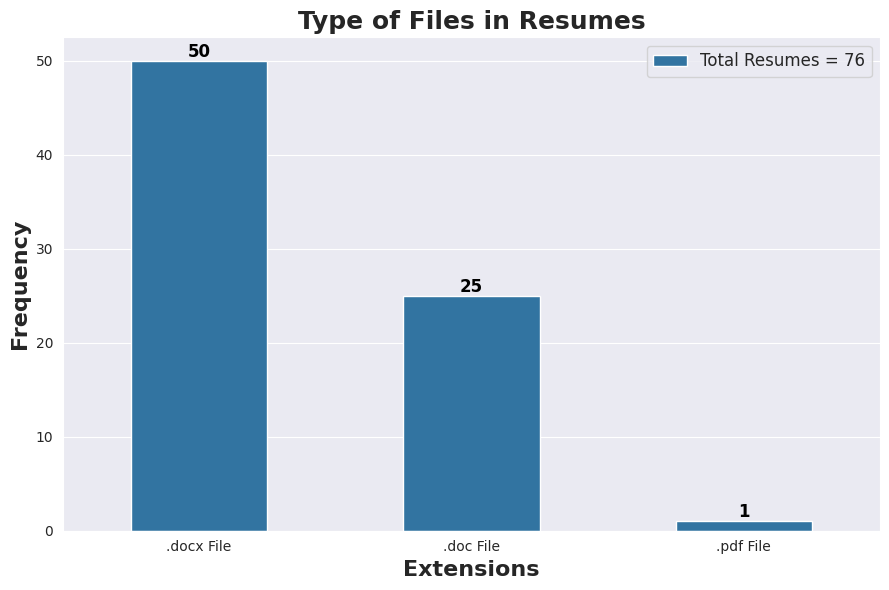

In [46]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

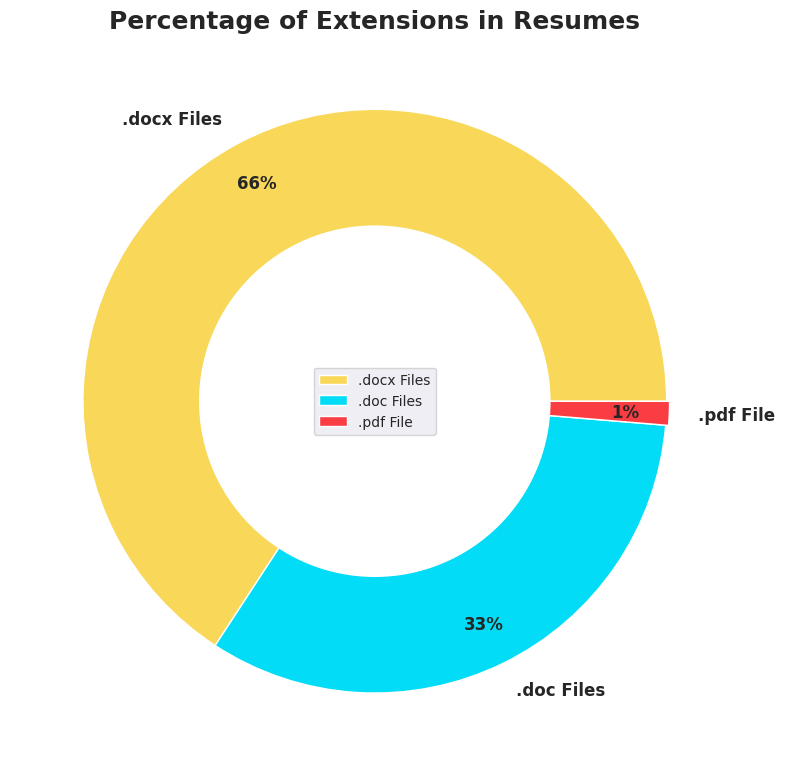

In [47]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85,
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

In [48]:
file_path = r'drive/MyDrive/Resumes_Docx/'
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)


In [49]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resume_Details'] = file_name
resume_data

,Profile,Resume_Details
0,Peoplesoft,Peoplesoft Admin_G Ananda Rayudu.docx
1,Peoplesoft Resume,Peoplesoft FSCM_PriyabrataHota.docx
2,Peoplesoft Resume,Peoplesoft Admin_Vinod Akkala.doc
3,Peoplesoft Resume,Peoplesoft Admin_Varkala Vikas.docx
4,Peoplesoft Resume,Peoplesoft Admin_SirazuddinMohammad.docx
...,...,...
71,workday,RahulM_Hexaware.docx
72,workday,Madeeswar A_Hexaware.doc
73,workday,MooraboyinaGuravaiah_Hexaware.docx
74,workday,Harikrishna Akula_Hexaware.doc


In [50]:
resume_data.Profile.value_counts().index

Index(['React Developer', 'workday', 'Peoplesoft Resume', 'SQL Developer',
       'Peoplesoft'],
      dtype='object', name='Profile')

In [51]:
resume_data.Profile.value_counts()

Profile
React Developer      22
workday              20
Peoplesoft Resume    19
SQL Developer        14
Peoplesoft            1
Name: count, dtype: int64

In [52]:
explode = (0.01, 0.01, 0.01, 0.01, 0.01)

In [53]:
explode = [0.01] * len(sizes)

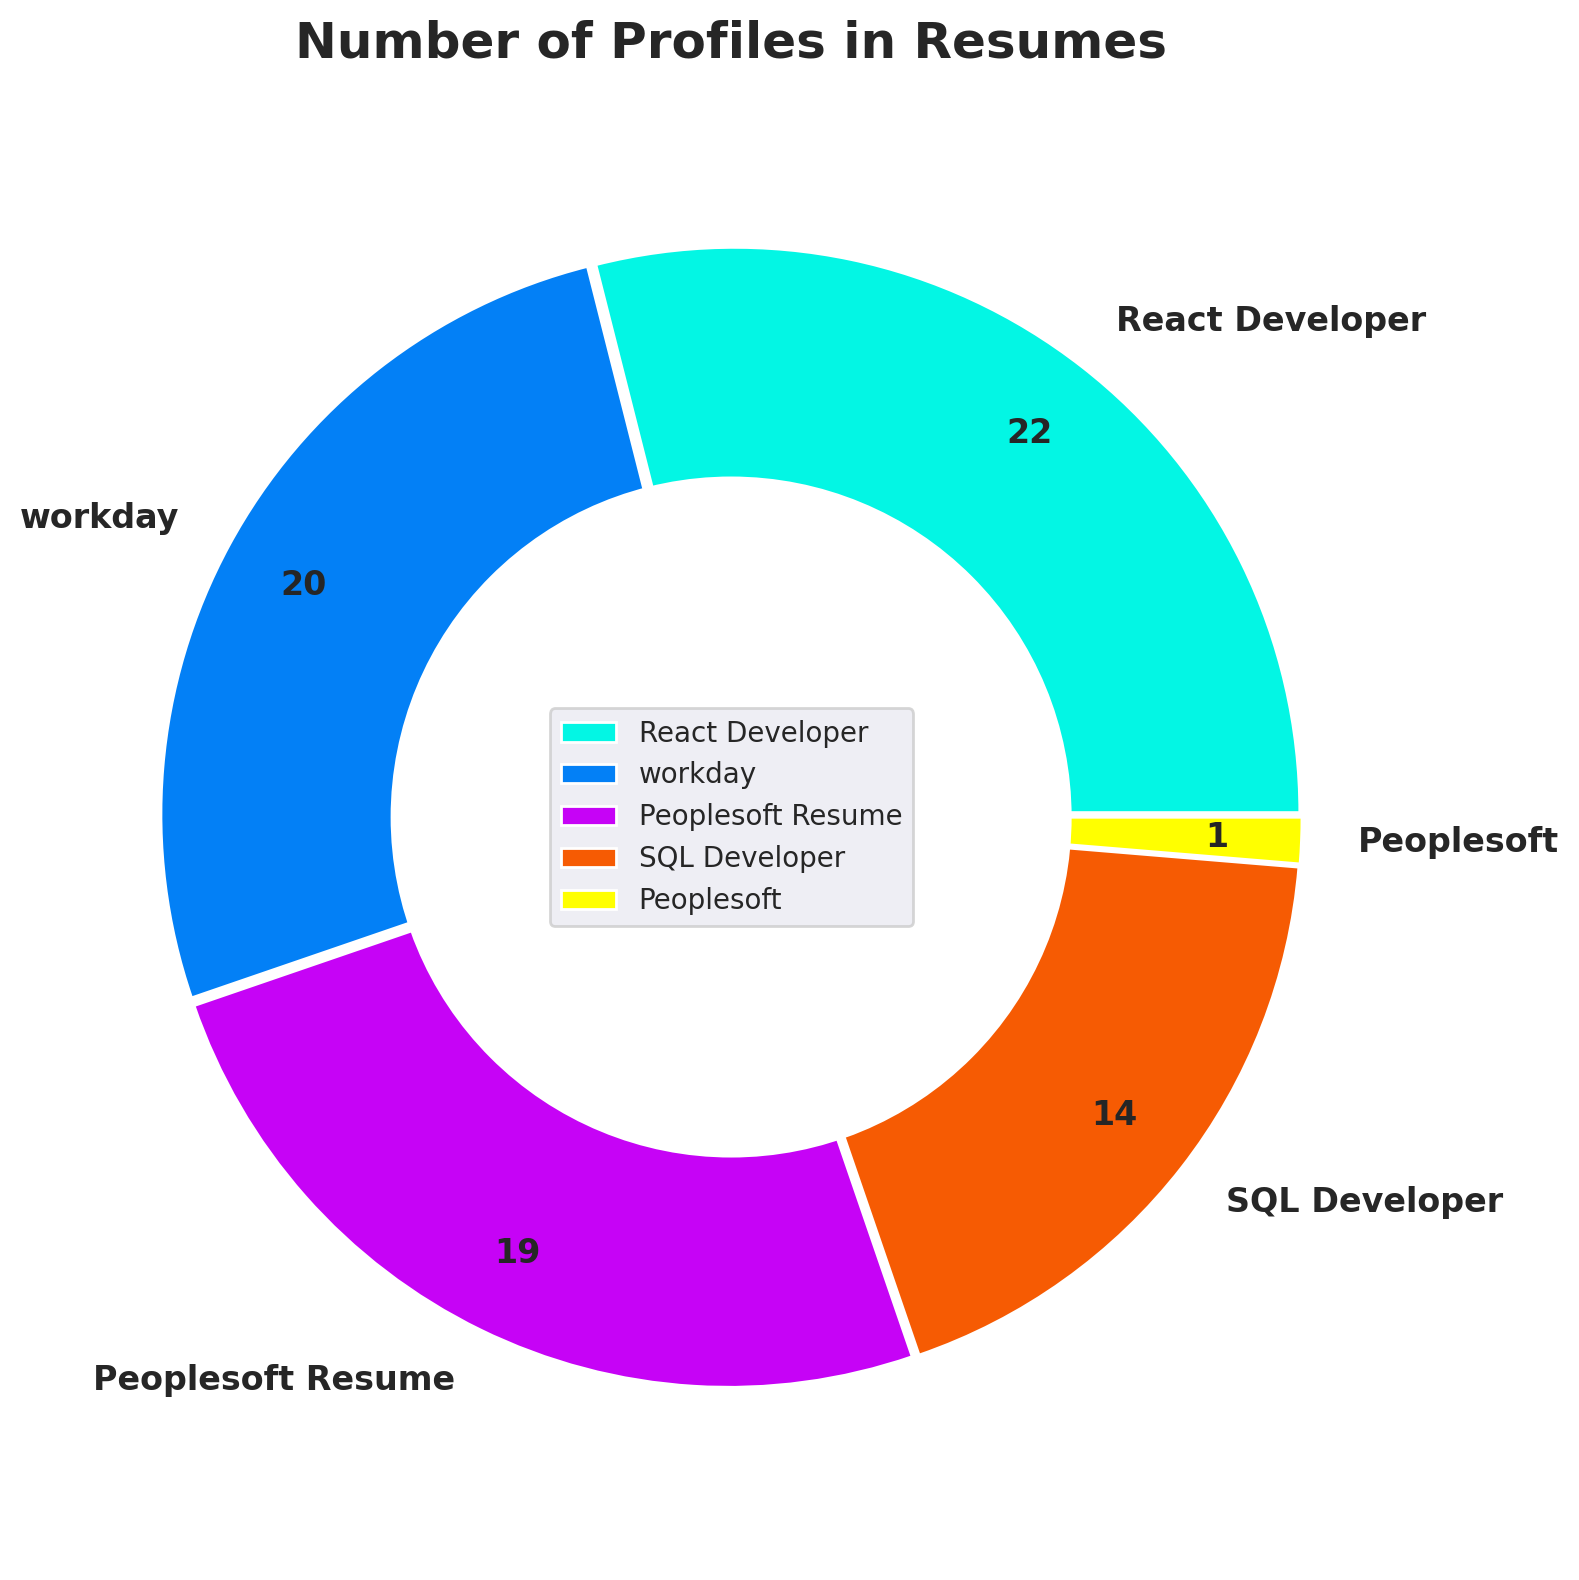

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming resume_data is your DataFrame containing resume profiles
sizes = resume_data['Profile'].value_counts()
labels = sizes.index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03', '#FFFF00']
explode = [0.01] * len(sizes)  # Explode to highlight slices

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8), dpi=200)

# Plotting the pie chart
wedges, texts, autotexts = ax.pie(sizes, colors=colors, labels=labels, autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
                                  pctdistance=0.85, explode=explode, startangle=0,
                                  textprops={'size': 'large', 'fontweight': 'bold'})

# Add a white circle to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
ax.add_artist(centre_circle)

# Set title and legend
ax.set_title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
ax.legend(labels, loc='center')

# Ensure equal aspect ratio and layout adjustments
ax.axis('equal')
plt.tight_layout()

# Show the pie chart
plt.show()




Text(0.5, 1.0, 'Number of Profiles in Resumes')

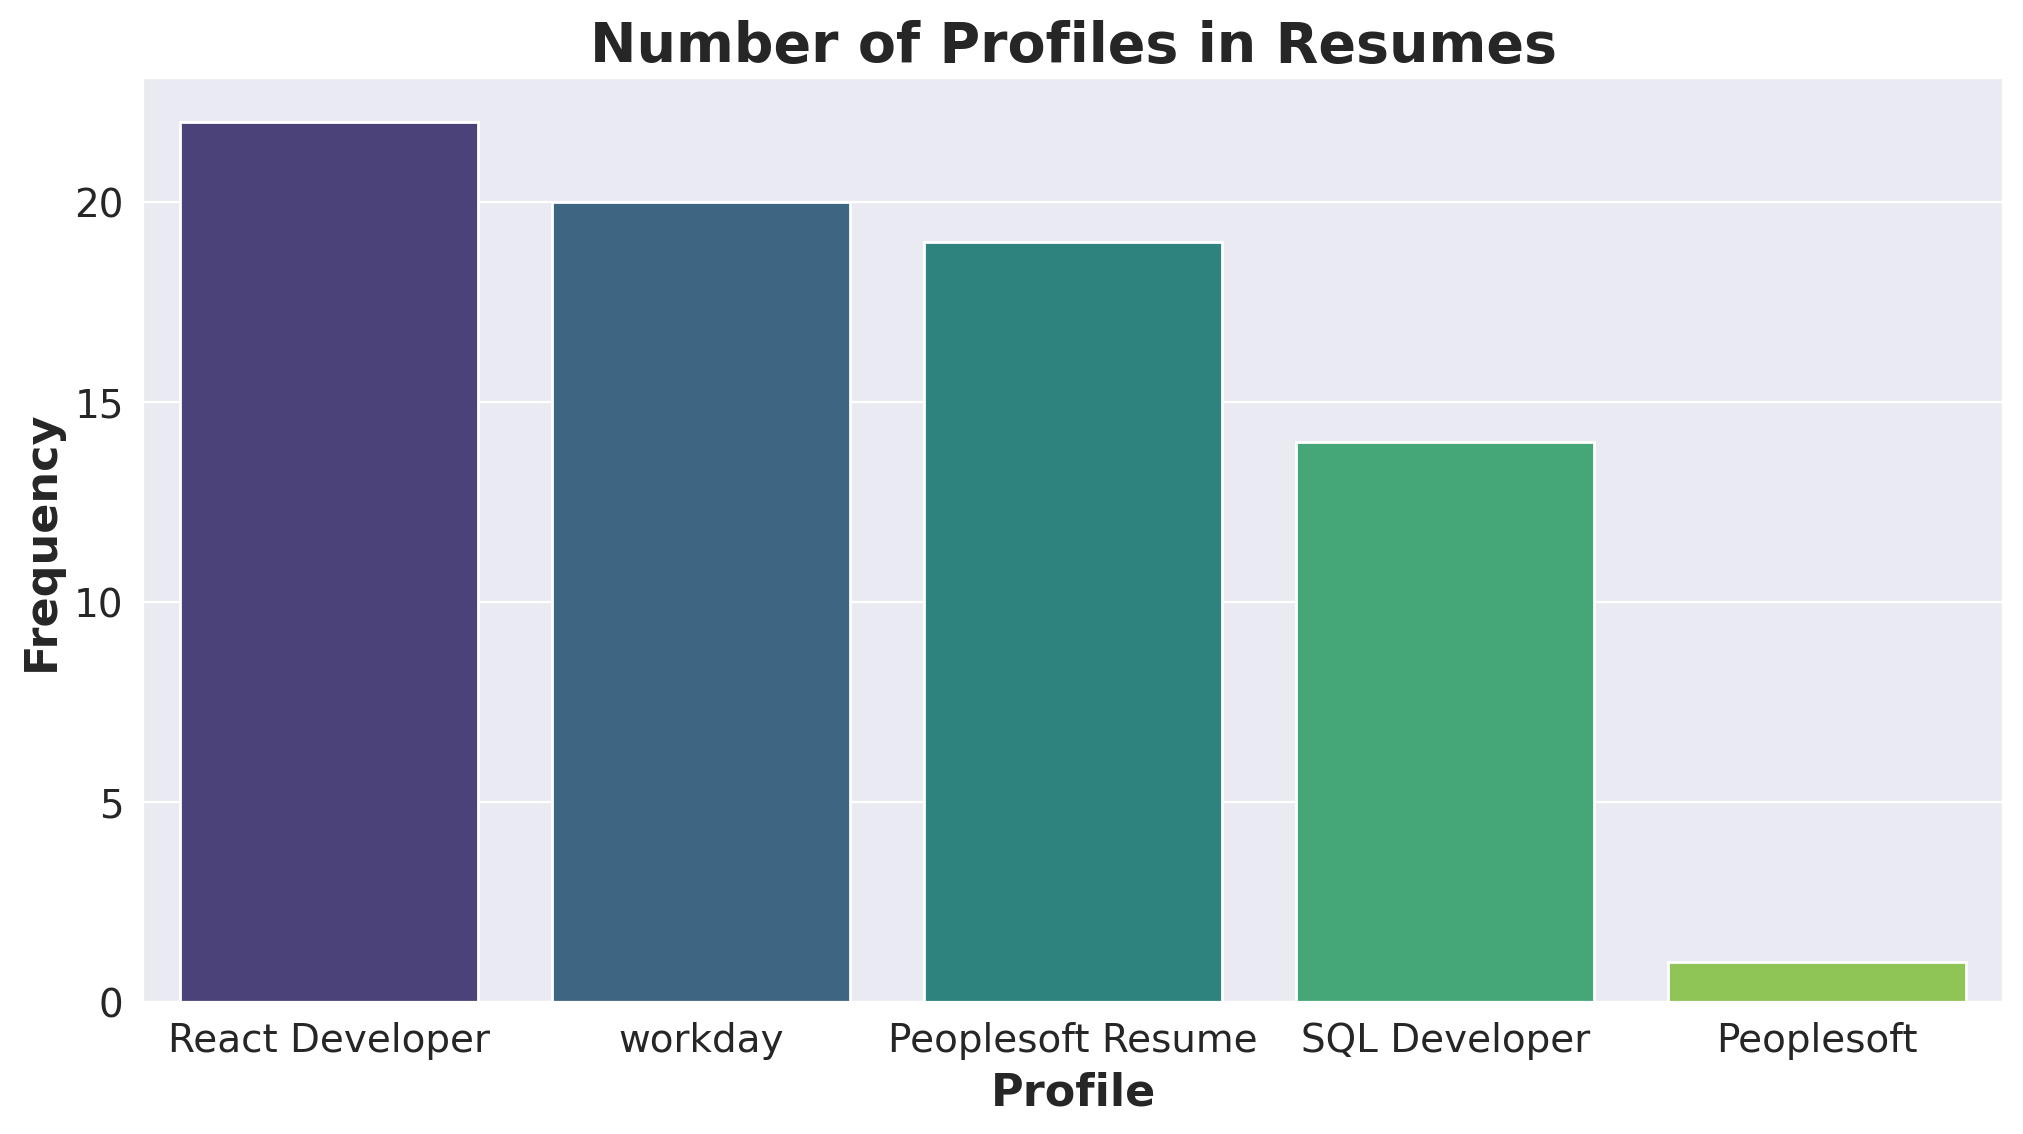

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=200)
sns.barplot(x=sizes.index, y=sizes, ax=ax, palette='viridis')
ax.set_xlabel('Profile', size=16, fontweight='bold')
ax.set_ylabel('Frequency', size=16, fontweight='bold')
ax.set_title('Number of Profiles in Resumes', fontsize=20, fontweight='bold')

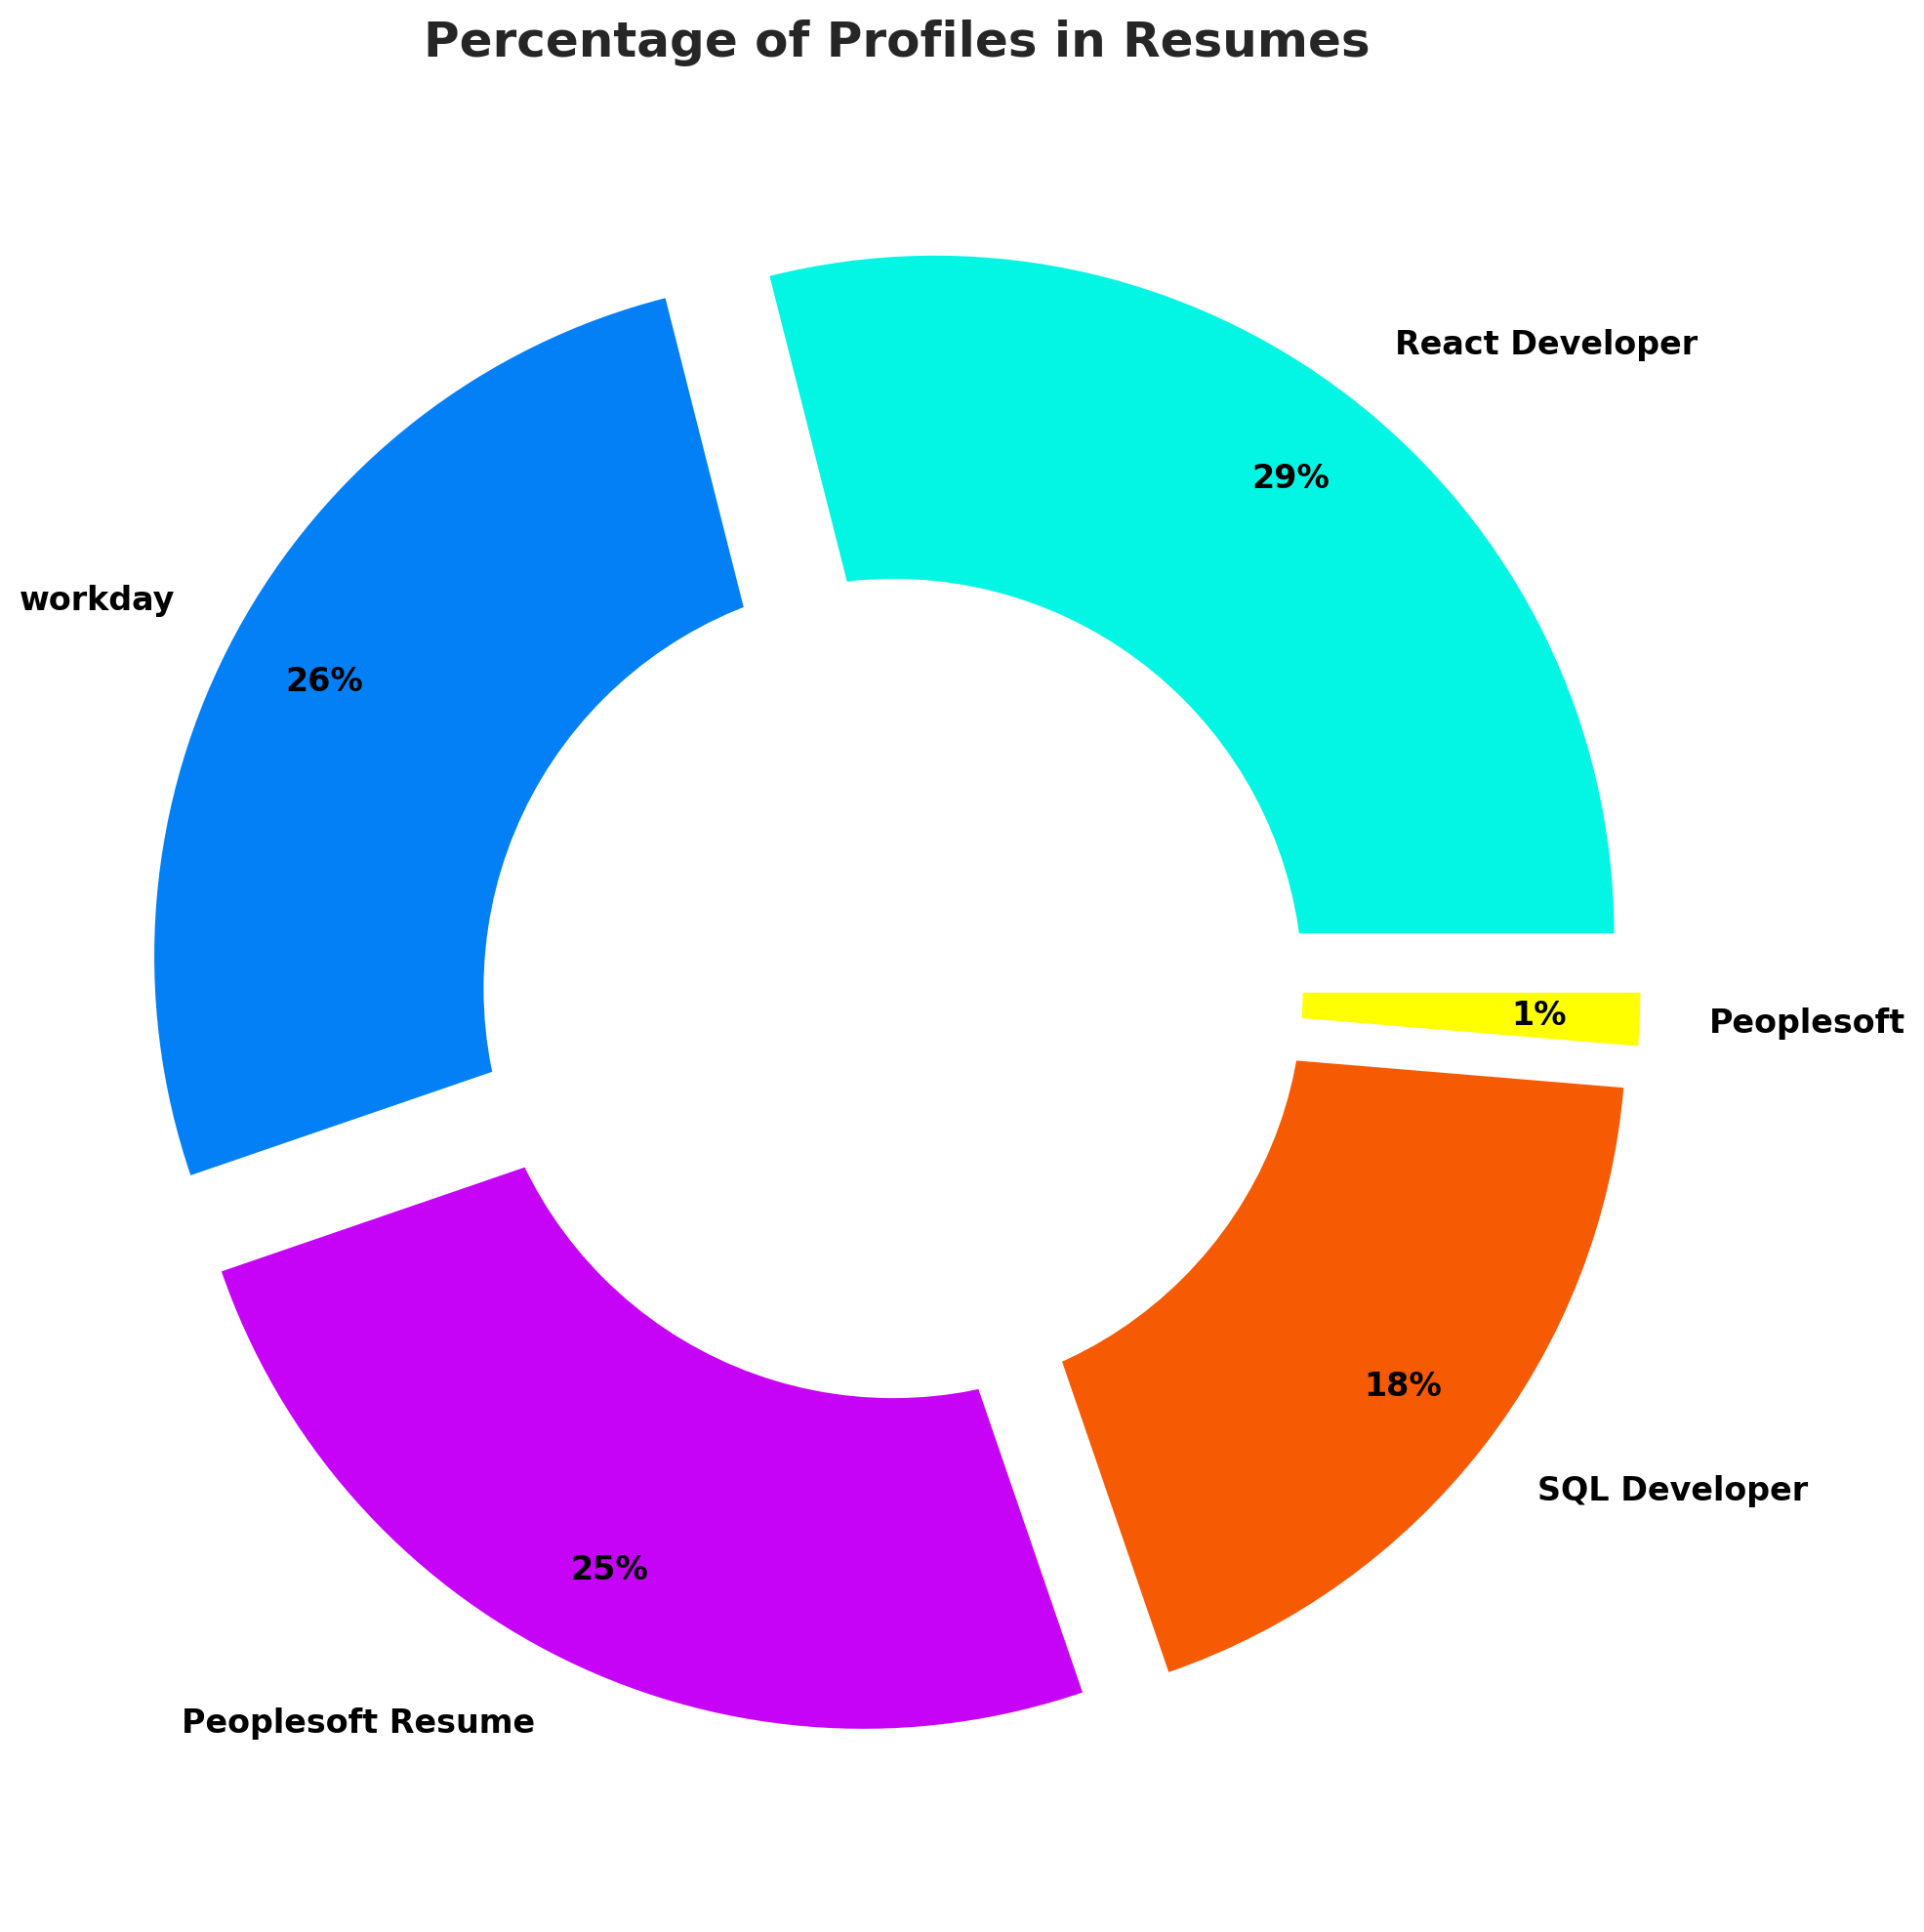

In [56]:
# Assuming resume_data is your DataFrame containing resume profiles
sizes = resume_data['Profile'].value_counts()
labels = sizes.index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03', '#FFFF00']
explode = [0.1] * len(sizes)  # Explode to highlight slices

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10), dpi=200)

# Plotting the pie chart
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%',
                                   pctdistance=0.85, explode=explode, startangle=0,
                                   textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
ax.set_title('Percentage of Profiles in Resumes', fontsize=18, fontweight='bold')

# Add a white circle to create a donut chart effect
ax.add_artist(plt.Circle((0, 0), 0.60, fc='white'))

# Equal aspect ratio and layout adjustments
ax.axis('equal')
plt.tight_layout()

# Show the pie chart
plt.show()

In [57]:


# Function to extract text from .docx file
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

# Replace the path with the correct one for your operating system
docx_path = 'drive/MyDrive/Resumes_Docx/React Developer/React Developer_Haripriya.docx'
print(extract_text_from_docx(docx_path))


HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

In [58]:
!python -m textblob.download_corpora
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


[WordList(['Peoplesoft', 'FSCM_PriyabrataHota.docx'])]

In [59]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[]

In [60]:
resume_data['Resume_Details']

0        Peoplesoft Admin_G Ananda Rayudu.docx
1          Peoplesoft FSCM_PriyabrataHota.docx
2            Peoplesoft Admin_Vinod Akkala.doc
3          Peoplesoft Admin_Varkala Vikas.docx
4     Peoplesoft Admin_SirazuddinMohammad.docx
                        ...                   
71                        RahulM_Hexaware.docx
72                    Madeeswar A_Hexaware.doc
73          MooraboyinaGuravaiah_Hexaware.docx
74              Harikrishna Akula_Hexaware.doc
75                 Hari Krishna M_Hexaware.doc
Name: Resume_Details, Length: 76, dtype: object

5.2 Top 20 most used words in Resumes
Using CountVectorizer

In [61]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [62]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,50,docx
1,25,doc
2,20,peoplesoft
3,12,react
4,10,technologies
5,9,technologies docx
6,8,reactjs
7,3,react js
8,3,js
9,3,hexaware docx


AttributeError: 'DataFrame' object has no attribute 'Category'

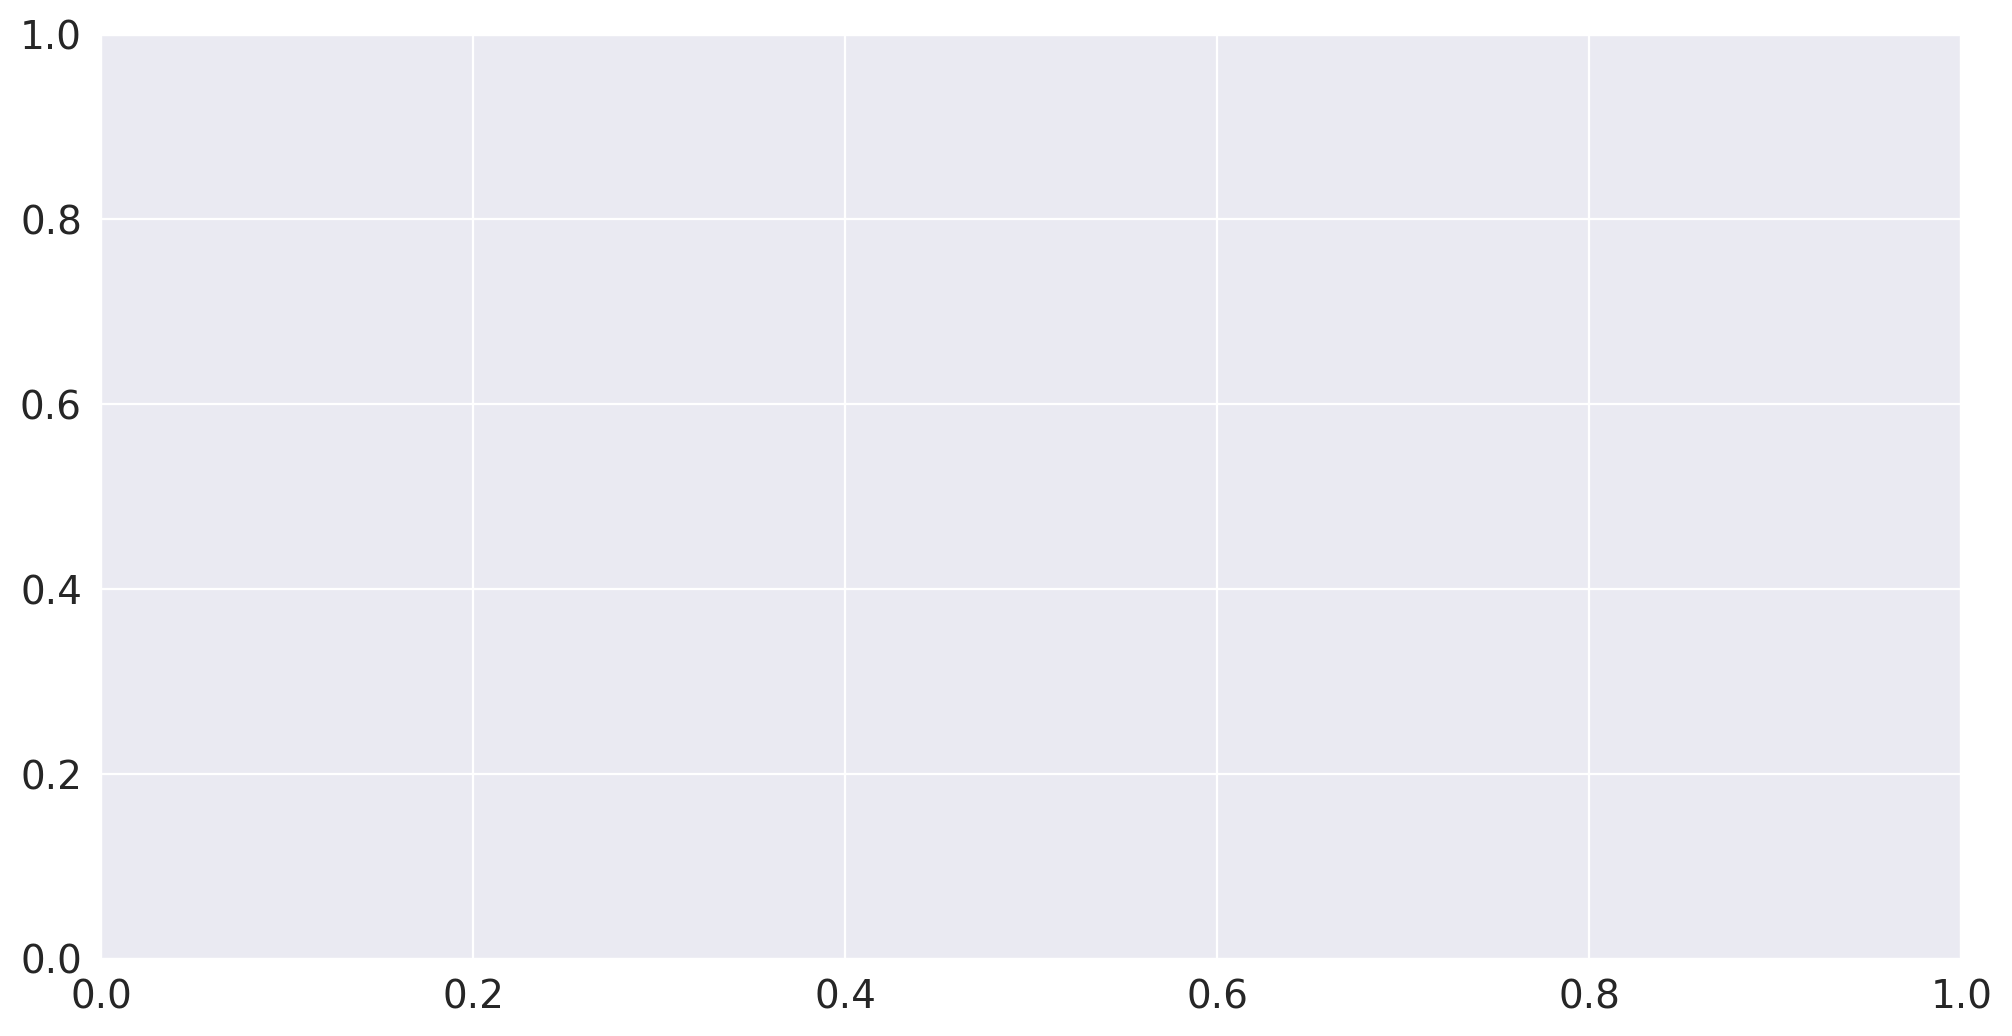

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [10]:
resume_data = pd.read_csv("Cleaned_Resumes.csv")
resume_data.head()

,Category,Resume_Details
0,workday,chinna subbarayudu dob march nationality india...
1,workday,convert content drive mydrive resumes_docx wor...
2,workday,convert content drive mydrive resumes_docx wor...
3,workday,vinay kumar workday functional consultant expe...
4,workday,srikanth workday hcm consultant seeking suitab...


In [11]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,workday,chinna subbarayudu dob march nationality india...,4
1,workday,convert content drive mydrive resumes_docx wor...,4
2,workday,convert content drive mydrive resumes_docx wor...,4
3,workday,vinay kumar workday functional consultant expe...,4
4,workday,srikanth workday hcm consultant seeking suitab...,4
...,...,...,...
74,Peoplesoft Resume,classification internal classification interna...,1
75,Peoplesoft Resume,sirazuddin bangalore india sirazuddin bangalor...,1
76,Peoplesoft Resume,convert content drive mydrive resumes_docx peo...,1
77,Peoplesoft Resume,tanna sujatha objective seeking challenging ro...,1


In [12]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,2.430380
std,1.173244
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,4.000000


In [13]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

In [14]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [36]:
'''!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=45)
x_train, y_train = smote.fit_resample(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=45, test_size=0.25)'''

'!pip install imbalanced-learn\nfrom imblearn.over_sampling import SMOTE\n\nsmote = SMOTE(random_state=45)\nx_train, y_train = smote.fit_resample(x_train, y_train)\n\nx_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=45, test_size=0.25)'

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25)
x_train.shape, x_test.shape

((59,), (20,))

Vectorization

In [17]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [18]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [19]:
x_train.shape, x_test.shape

((59, 3852), (20, 3852))

In [20]:
print(y_train),print(y_test)

['React Developer' 'SQL Developer' 'React Developer' 'Peoplesoft Resume'
 'SQL Developer' 'Peoplesoft' 'workday' 'workday' 'SQL Developer'
 'Peoplesoft Resume' 'React Developer' 'workday' 'SQL Developer'
 'React Developer' 'Peoplesoft Resume' 'React Developer'
 'Peoplesoft Resume' 'workday' 'React Developer' 'workday'
 'Peoplesoft Resume' 'React Developer' 'workday' 'React Developer'
 'React Developer' 'workday' 'Peoplesoft Resume' 'Peoplesoft Resume'
 'React Developer' 'SQL Developer' 'SQL Developer' 'React Developer'
 'React Developer' 'Peoplesoft Resume' 'Peoplesoft Resume'
 'Peoplesoft Resume' 'workday' 'React Developer' 'workday'
 'Peoplesoft Resume' 'SQL Developer' 'Peoplesoft Resume' 'SQL Developer'
 'workday' 'Peoplesoft Resume' 'workday' 'React Developer'
 'React Developer' 'React Developer' 'workday' 'Peoplesoft Resume'
 'workday' 'Peoplesoft Resume' 'React Developer' 'Peoplesoft Resume'
 'SQL Developer' 'workday' 'SQL Developer' 'Peoplesoft Resume']
['SQL Developer' 'SQL Dev

(None, None)

KNN Classifier

In [21]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.58
Accuracy of  test set    : 0.45
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                   precision    recall  f1-score   support

Peoplesoft Resume       0.21      1.00      0.35         3
  React Developer       1.00      1.00      1.00         6
    SQL Developer       0.00      0.00      0.00         4
          workday       0.00      0.00      0.00         7

         accuracy                           0.45        20
        macro avg       0.30      0.50      0.34        20
     weighted avg       0.33      0.45      0.35        20




Decision Tree Classifier

In [22]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier DecisionTreeClassifier():
                   precision    recall  f1-score   support

Peoplesoft Resume       0.75      1.00      0.86         3
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
          workday       1.00      0.86      0.92         7

         accuracy                           0.95        20
        macro avg       0.94      0.96      0.95        20
     weighted avg       0.96      0.95      0.95        20




Random Forest Classifier

In [23]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         3
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
          workday       1.00      1.00      1.00         7

         accuracy                           1.00        20
        macro avg       1.00      1.00      1.00        20
     weighted avg       1.00      1.00      1.00        20




Support Vectore Machine (SVM) Classifier

In [24]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         3
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
          workday       1.00      1.00      1.00         7

         accuracy                           1.00        20
        macro avg       1.00      1.00      1.00        20
     weighted avg       1.00      1.00      1.00        20




Logistic Regression

In [25]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         3
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
          workday       1.00      1.00      1.00         7

         accuracy                           1.00        20
        macro avg       1.00      1.00      1.00        20
     weighted avg       1.00      1.00      1.00        20




Bagging Classifier

In [26]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 0.95
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      0.67      0.80         3
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
          workday       0.88      1.00      0.93         7

         accuracy                           0.95        20
        macro avg       0.97      0.92      0.93        20
     weighted avg       0.96      0.95      0.95        20




AdaBoost Classifier

In [27]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.95
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         3
  React Developer       0.86      1.00      0.92         6
    SQL Developer       1.00      1.00      1.00         4
          workday       1.00      0.86      0.92         7

         accuracy                           0.95        20
        macro avg       0.96      0.96      0.96        20
     weighted avg       0.96      0.95      0.95        20




Gradient Boosting Classifier

In [28]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         3
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
          workday       1.00      1.00      1.00         7

         accuracy                           1.00        20
        macro avg       1.00      1.00      1.00        20
     weighted avg       1.00      1.00      1.00        20




Naive Bayes Classifier

In [29]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                   precision    recall  f1-score   support

Peoplesoft Resume       1.00      1.00      1.00         3
  React Developer       1.00      1.00      1.00         6
    SQL Developer       1.00      1.00      1.00         4
          workday       1.00      1.00      1.00         7

         accuracy                           1.00        20
        macro avg       1.00      1.00      1.00        20
     weighted avg       1.00      1.00      1.00        20




In [30]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.576271,0.45,0.30,0.50,0.34
1,DecisionTree Classifier,1.000000,0.95,0.94,0.96,0.95
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,0.983051,1.00,1.00,1.00,1.00
4,Logistic Regression,0.983051,1.00,1.00,1.00,1.00
5,Bagging Classifier,0.966102,0.95,0.97,0.92,0.93
6,AdaBoost Classifier,1.000000,0.95,0.96,0.96,0.96
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,0.983051,1.00,1.00,1.00,1.00


In [31]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

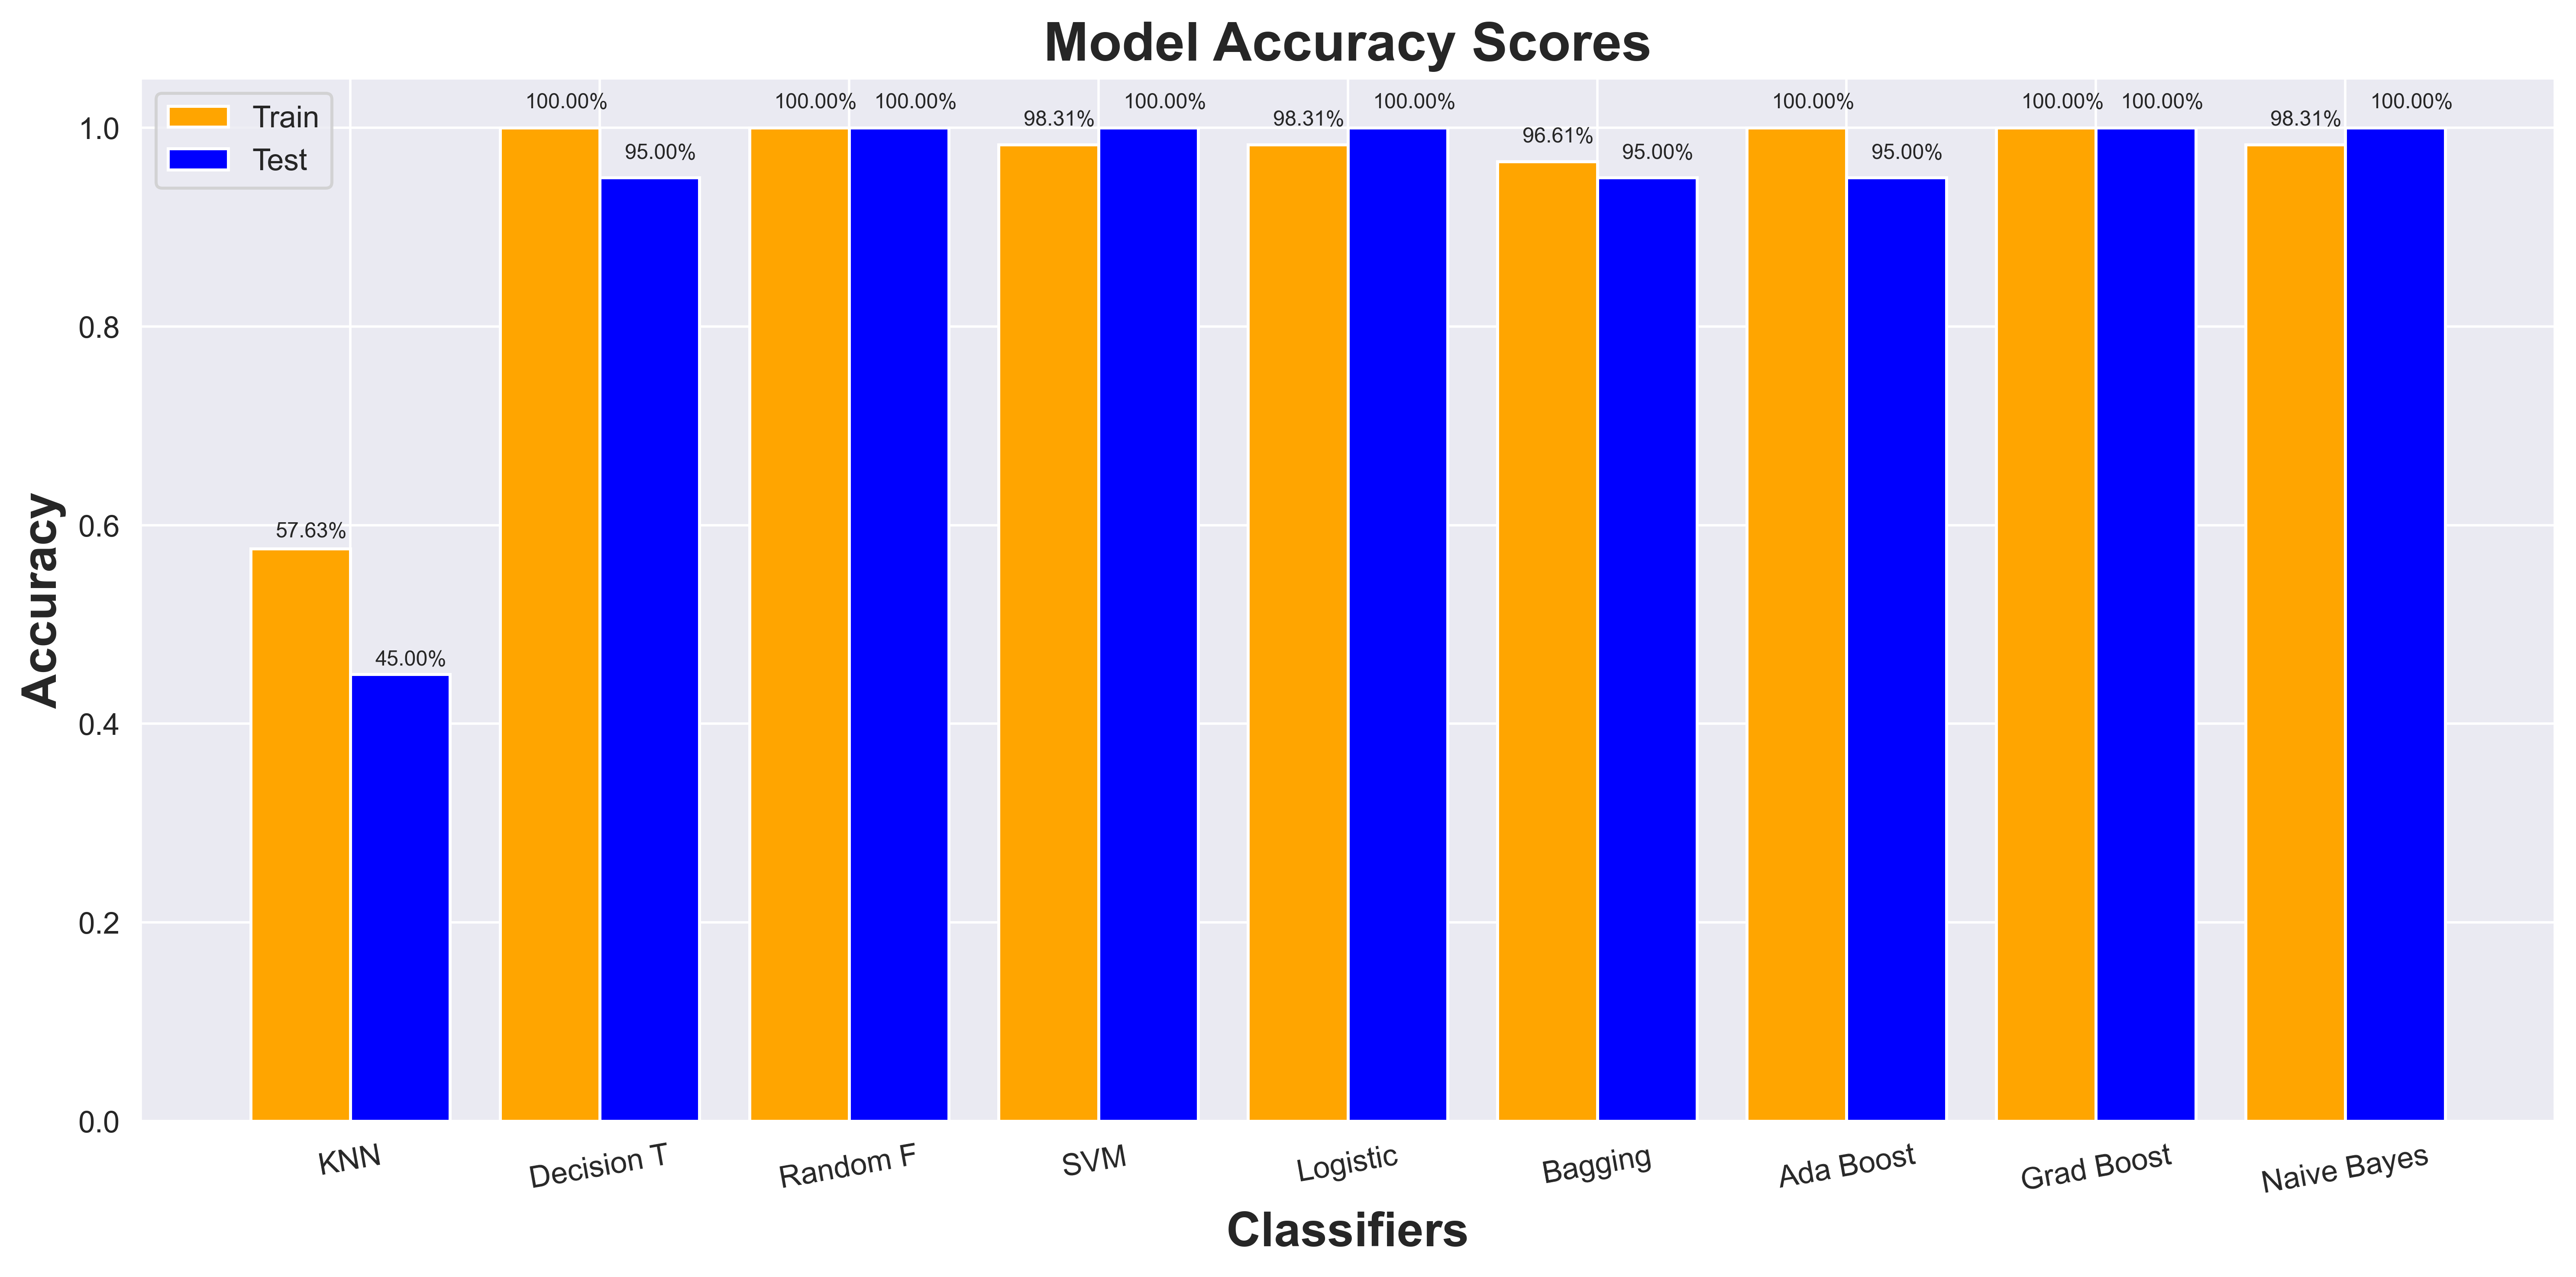

FileNotFoundError: [Errno 2] No such file or directory: 'IMG\\Mod_Acc_Bar.png'

In [32]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Mod_Acc_Bar', dpi = 500)

In [33]:
import pickle
filename = 'modelbagg.pkl'
pickle.dump(model_bagg,open(filename,'wb'))

In [34]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))